In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
df.drop(['id','store_nbr'],axis=1,inplace=True)
df.drop(['family','onpromotion'],axis=1,inplace=True)

In [5]:
df.head()

,date,sales
0,2013-01-01,0.0
1,2013-01-01,0.0
2,2013-01-01,0.0
3,2013-01-01,0.0
4,2013-01-01,0.0


In [6]:
df.isnull().sum()

date     0
sales    0
dtype: int64

In [17]:
df.tail()

,date,sales
3000883,2017-08-15,438.133
3000884,2017-08-15,154.553
3000885,2017-08-15,2419.729
3000886,2017-08-15,121.000
3000887,2017-08-15,16.000


In [8]:
df.dropna()

,date,sales
0,2013-01-01,0.000
1,2013-01-01,0.000
2,2013-01-01,0.000
3,2013-01-01,0.000
4,2013-01-01,0.000
...,...,...
3000883,2017-08-15,438.133
3000884,2017-08-15,154.553
3000885,2017-08-15,2419.729
3000886,2017-08-15,121.000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   date    object 
 1   sales   float64
dtypes: float64(1), object(1)
memory usage: 45.8+ MB


In [11]:
df['date']=pd.to_datetime(df['date'])

In [18]:
df = df.set_index("date").resample('M').sales.mean().reset_index()
df.head()

,date,sales
0,2013-01-31,405.290979
1,2013-02-28,405.702276
2,2013-03-31,420.892610
3,2013-04-30,413.257076
4,2013-05-31,415.941757


In [19]:
df = df.set_index('date')

In [20]:
df.dropna()

,sales
date,
2013-01-31,405.290979
2013-02-28,405.702276
2013-03-31,420.892610
2013-04-30,413.257076
2013-05-31,415.941757
2013-06-30,431.914871
2013-07-31,412.782363
2013-08-31,424.175662
2013-09-30,441.368810


<AxesSubplot:xlabel='date'>

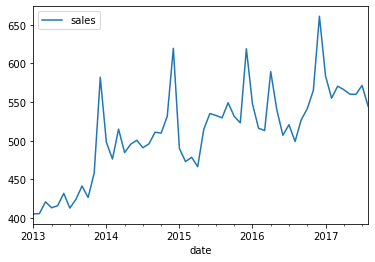

In [21]:
df.plot()

In [22]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [23]:
test_result=adfuller(df['sales'])

In [24]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [25]:
adfuller_test(df['sales'])

ADF Test Statistic : -2.108385087053108
p-value : 0.2411563109466009
#Lags Used : 11
Number of Observations Used : 44
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [26]:
#Differencing
df['Sales First Difference'] = df['sales'] - df['sales'].shift(1)

In [27]:
df['Seasonal First Difference']=df['sales']-df['sales'].shift(12)

In [28]:
df.head(14)

,sales,Sales First Difference,Seasonal First Difference
date,,,
2013-01-31,405.290979,NaN,NaN
2013-02-28,405.702276,0.411296,NaN
2013-03-31,420.892610,15.190334,NaN
2013-04-30,413.257076,-7.635534,NaN
2013-05-31,415.941757,2.684681,NaN
2013-06-30,431.914871,15.973114,NaN
2013-07-31,412.782363,-19.132508,NaN
2013-08-31,424.175662,11.393299,NaN
2013-09-30,441.368810,17.193148,NaN


In [29]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.3463821170736336
p-value : 0.012928286188876138
#Lags Used : 9
Number of Observations Used : 34
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='date'>

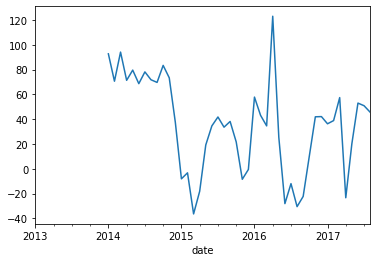

In [30]:
df['Seasonal First Difference'].plot()

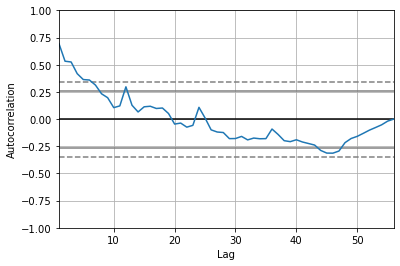

In [35]:
#Autoregressive Model
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['sales'])
plt.show()

In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

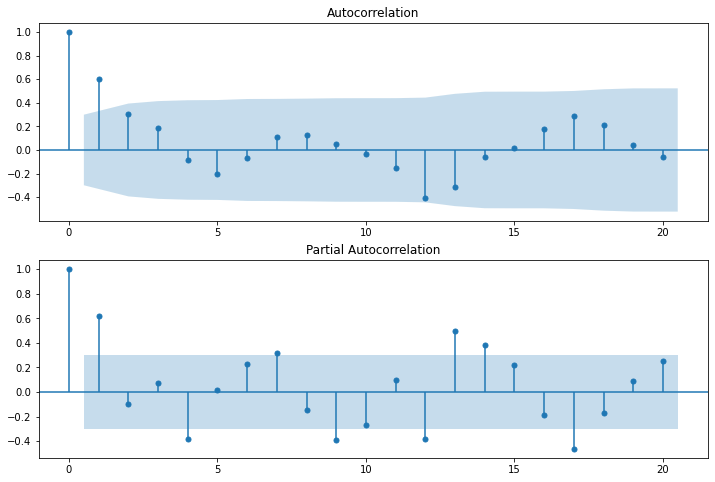

In [41]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=20,ax=ax2)

In [42]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [44]:
model=ARIMA(df['sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\prest\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\prest\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M wil

In [45]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.sales   No. Observations:                   55
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -275.818
Method:                       css-mle   S.D. of innovations             35.380
Date:                Sat, 17 Sep 2022   AIC                            559.637
Time:                        16:55:11   BIC                            567.666
Sample:                    02-28-2013   HQIC                           562.742
                         - 08-31-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.7143      0.445      6.093      0.000       1.841       3.587
ar.L1.D.sales     0.3629      0.130      2.786      0.005       0.108       0.618
ma.L1.D.sales    -0.9999      0.073    -13.750      0.000      -1.142      -0.857
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.7557           +0.0000j            2.7557            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

C:\Users\prest\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='date'>

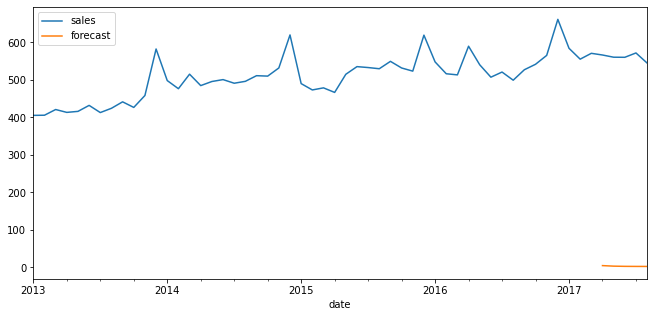

In [48]:
#forecasting present results to check
df['forecast']=model_fit.predict(start = '2017-04-30', end = '2017-08-31',dynamic=True)
df[['sales','forecast']].plot(figsize=(11,5))

In [ ]:
#import statsmodels.api as sm
#model=sm.tsa.statespace.SARIMAX(df['sales'],order=(5, 0, 0),seasonal_order=(5,0,0,12))
#results=model.fit()
#df['forecast']=results.predict(start = '2013-01-31', end = '2017-08-31',dynamic=True)
#df[['sales','forecast']].plot(figsize=(12,8))
#NOT GOOD

In [49]:
#creating future dataset with 2 months values as NaN
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,6)]
future_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df

,sales,Sales First Difference,Seasonal First Difference,forecast
2017-09-30,NaN,NaN,NaN,NaN
2017-10-31,NaN,NaN,NaN,NaN
2017-11-30,NaN,NaN,NaN,NaN
2017-12-31,NaN,NaN,NaN,NaN
2018-01-31,NaN,NaN,NaN,NaN


In [50]:
#merging future_df and df
future=pd.concat([df,future_df])
future.tail()

,sales,Sales First Difference,Seasonal First Difference,forecast
2017-09-30,NaN,NaN,NaN,NaN
2017-10-31,NaN,NaN,NaN,NaN
2017-11-30,NaN,NaN,NaN,NaN
2017-12-31,NaN,NaN,NaN,NaN
2018-01-31,NaN,NaN,NaN,NaN


In [52]:
#forecasting future values
future['forecast'] = model_fit.predict(start = '2017-07-31', end = '2018-01-31', dynamic= True)
future

C:\Users\prest\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


,sales,Sales First Difference,Seasonal First Difference,forecast
2013-01-31,405.290979,NaN,NaN,NaN
2013-02-28,405.702276,0.411296,NaN,NaN
2013-03-31,420.892610,15.190334,NaN,NaN
2013-04-30,413.257076,-7.635534,NaN,NaN
2013-05-31,415.941757,2.684681,NaN,NaN
...,...,...,...,...
2017-09-30,NaN,NaN,NaN,4.531364
2017-10-31,NaN,NaN,NaN,3.373657
2017-11-30,NaN,NaN,NaN,2.953545
2017-12-31,NaN,NaN,NaN,2.801092


<AxesSubplot:>

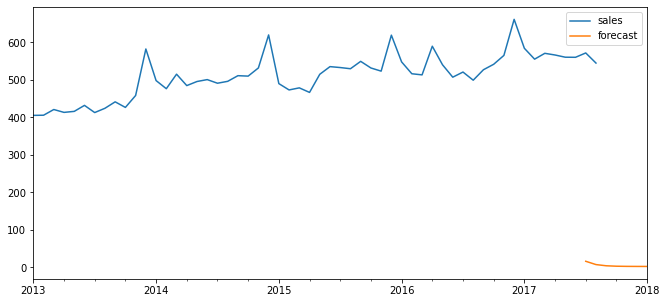

In [53]:
future[['sales', 'forecast']].plot(figsize=(11,5))

In [54]:
future = future.fillna(0)
future

,sales,Sales First Difference,Seasonal First Difference,forecast
2013-01-31,405.290979,0.000000,0.0,0.000000
2013-02-28,405.702276,0.411296,0.0,0.000000
2013-03-31,420.892610,15.190334,0.0,0.000000
2013-04-30,413.257076,-7.635534,0.0,0.000000
2013-05-31,415.941757,2.684681,0.0,0.000000
...,...,...,...,...
2017-09-30,0.000000,0.000000,0.0,4.531364
2017-10-31,0.000000,0.000000,0.0,3.373657
2017-11-30,0.000000,0.000000,0.0,2.953545
2017-12-31,0.000000,0.000000,0.0,2.801092


In [56]:
#most appropriate for models that don’t change swiftly based on changes in data distribution. If the data distribution changes are unexpected and ignorable, it may be a good idea to use MAEfrom sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(future['sales'], future['forecast'])

469.56895366835033